<a href="https://colab.research.google.com/github/saniagonsalves/DM_Clustering-Techniques/blob/main/3_Sania_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DM Assignment

**c)Gaussian mixture models clustering**

Iris Dataset link- https://drive.google.com/file/d/1J7Sg68ZUIf-E9Gapq9ZJ7RfiBJUWgrKg/view?usp=sharing



In this assignment the Gaussian mixture model is fitted with EM algorithm on iris dataset. Parametrisation use both the means and the covariance matrices of  K  mixture components  

In [ ]:
from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

load and inspect iris data 

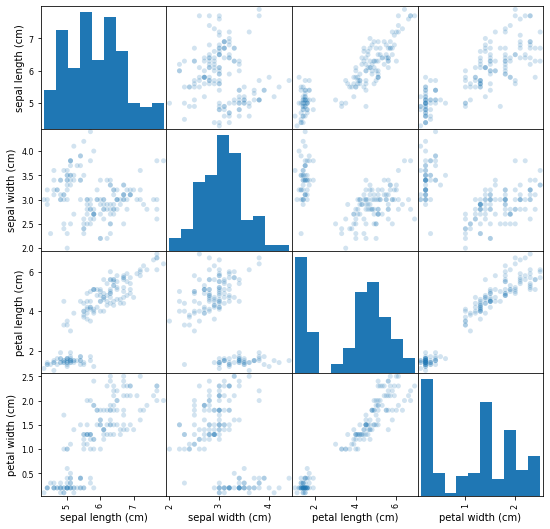

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#load iris data; pairwise plots
iris = datasets.load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)
axes= pd.plotting.scatter_matrix(df,figsize=(9, 9), s=100, alpha=0.2)
plt.show()

use petal length and petal width dimensions and run the good old  K -means with  K=3

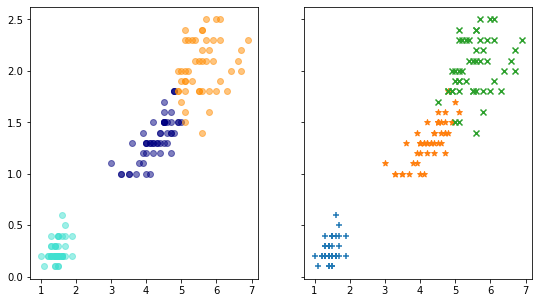

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

Different colors correspond to the clusters obtained by  K -means, whereas different markers correspond to the original class labels: setosa, virginica, versicolor.

K=3  mixture components

In [ ]:
# GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits a mixture model using EM

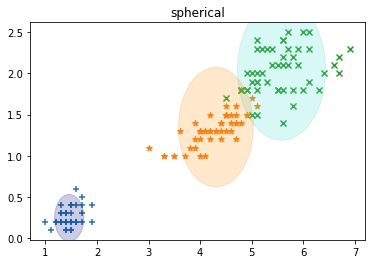

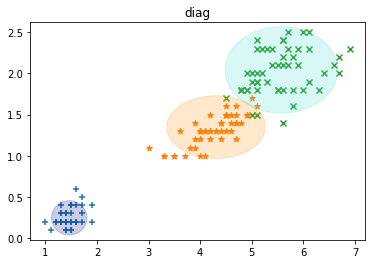

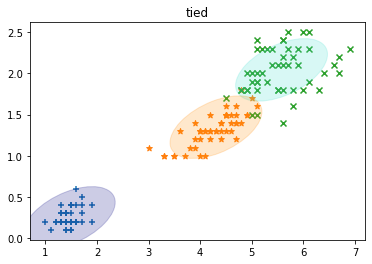

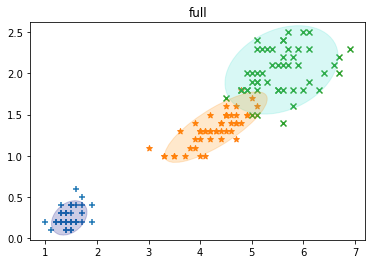

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

Gaussian mixture models with different covariance structures:

* spherical: all mixture components have spherical, but possibly different covariance matrices.
* diagonal: contours of the mixture components are axis-aligned
* tied: all mixture components share the same covariance matrix, which need not be diagonal
* full: all mixture components are free to have a full  submission of its own.
